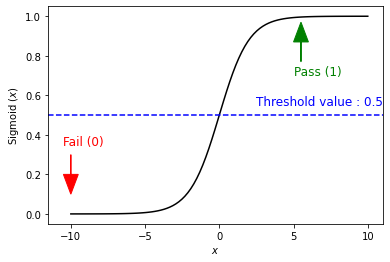

In [1]:
# Generate sigmoid figure

import matplotlib.pyplot as plt
import numpy as np
import math
  
# calculate sigmoid
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))

# plot sigmoid
plt.plot(x, z, color='black')

# label axes
plt.xlabel("$\it{x}$")
plt.ylabel("Sigmoid ($\it{x}$)")

# add threshold and label
plt.axhline(y=0.5, color='b', linestyle='--')
plt.text(2.5,0.55,'Threshold value : 0.5', color='b', fontsize=12)

# add arrows
plt.arrow(5.5, 0.77, 0, 0.2, length_includes_head=True,
          head_width=1, head_length=0.1, color='g')
plt.text(5, 0.7,'Pass (1)', color='g', fontsize=12)

plt.arrow(-10, 0.3, 0, -0.2, length_includes_head=True,
          head_width=1, head_length=0.1, color='r')
plt.text(-10.5, 0.35,'Fail (0)', color='r', fontsize=12)


  
plt.savefig('img/logit.png', dpi=300)
    
plt.show()

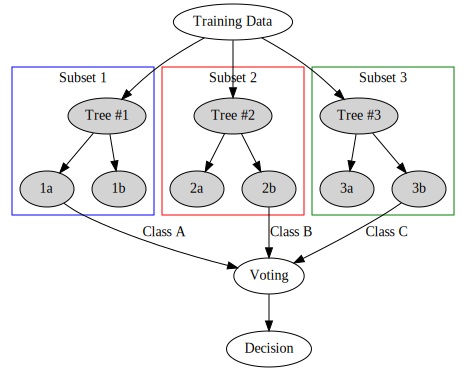

In [2]:
# Generate Random Forest figure
# https://www.graphviz.org/pdf/dotguide.pdf
# https://graphviz.readthedocs.io/en/stable/examples.html
# https://graphviz.readthedocs.io/en/stable/api.html#graphviz.render

from graphviz import Digraph

dot = Digraph('G', filename='cluster.gv')

# root
dot.node('x', 'Training Data')

with dot.subgraph(name='cluster_0') as c:
    c.attr(color='blue')
    c.node_attr['style'] = 'filled'
    c.edges([('Tree #1', '1a'), ('Tree #1', '1b')])
    c.attr(label='Subset 1')
    

with dot.subgraph(name='cluster_1') as c:
    c.attr(color='red')
    c.node_attr['style'] = 'filled'
    c.edges([('Tree #2', '2a'), ('Tree #2', '2b')])
    c.attr(label='Subset 2')
    
with dot.subgraph(name='cluster_2') as c:
    c.attr(color='green')
    c.node_attr['style'] = 'filled'
    c.edges([('Tree #3', '3a'), ('Tree #3', '3b')])
    c.attr(label='Subset 3')

dot.edges([('x','Tree #1'),('x','Tree #2'),('x','Tree #3')])

dot.edge('1a','Voting', label='Class A')
dot.edge('2b','Voting', label='Class B')
dot.edge('3b','Voting', label='Class C')

dot.edge('Voting','Decision', shape='box')
# dot.render(filename='img/randomforest.png')
dot.render(filename='img/randomforest', format='png')
dot